In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression

In [6]:
column_names = [
    'Measurement_ID', 'Timestamp', 'Tag_ID',
    'First_Anchor_ID', 'Distance_From_First_Anchor',
    'Second_Anchor_ID', 'Distance_From_Second_Anchor'
]


file_path = "UWB_timestamps.txt"

data = pd.read_csv(file_path, delim_whitespace=True, names=column_names)

data = data[data['Tag_ID'] == 1]

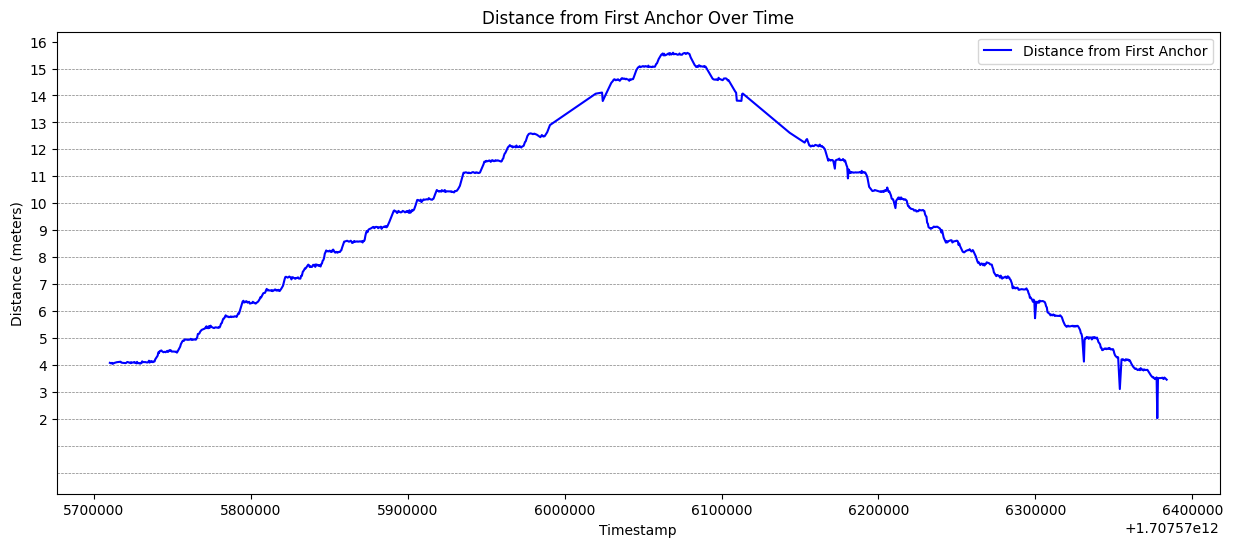

In [7]:
# Plotting the distance measurements over time to identify standing and moving periods
plt.figure(figsize=(15,6))

# Plotting distance from the first anchor
plt.plot(data['Timestamp'], data['Distance_From_First_Anchor'],
         label='Distance from First Anchor', color='blue')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Distance (meters)')
plt.title('Distance from First Anchor Over Time')
plt.legend()

plt.yticks(np.arange(min(round(data['Distance_From_First_Anchor'])), max(
    round(data['Distance_From_First_Anchor'])) + 1, 1))

for i in range(0, 16):
    plt.axhline(y=i, color='gray', linestyle='--', linewidth=0.5, zorder=0)


# Show the plot
plt.show()

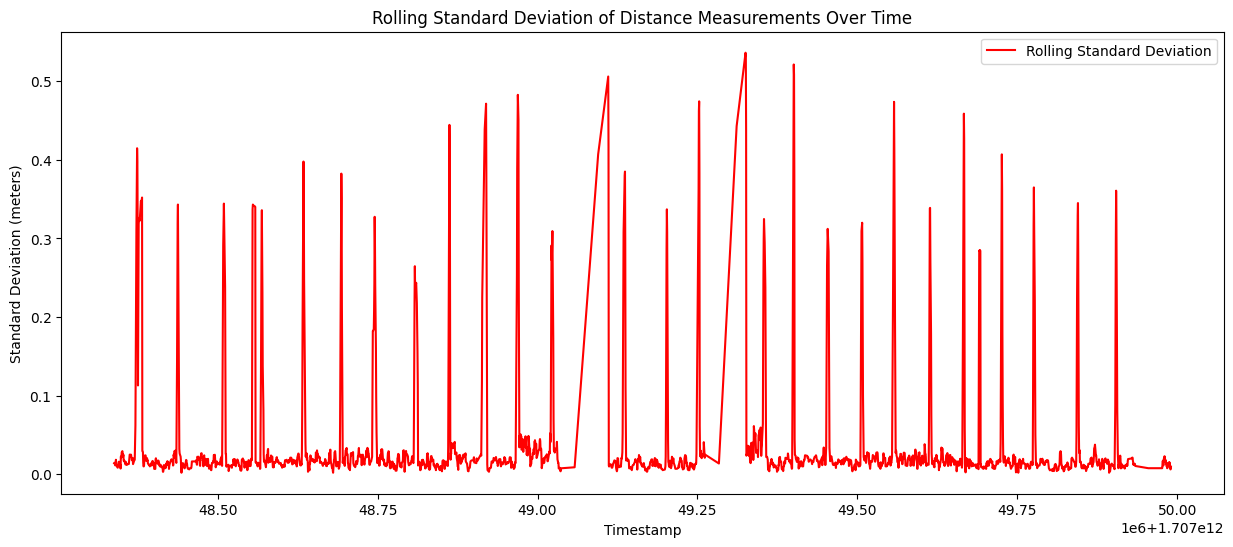

In [6]:
# Calculating a rolling standard deviation to identify periods of low and high variability
# Window size for rolling calculation, can be adjusted based on the data frequency
window_size = 5

data['Rolling_STD'] = data['Distance_From_First_Anchor'].rolling(window=window_size).std()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data['Rolling_STD'])

# Plotting the rolling standard deviation over time
plt.figure(figsize=(15,6))

# Plotting rolling standard deviation
plt.plot(data['Timestamp'], data['Rolling_STD'],
         label='Rolling Standard Deviation', color='red')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Standard Deviation (meters)')
plt.title('Rolling Standard Deviation of Distance Measurements Over Time')
plt.legend()

# Show the plot
plt.show()

In [7]:
# Setting a threshold for the rolling standard deviation to classify standing vs moving
# This threshold can be adjusted based on the data characteristics
# std_threshold = data['Rolling_STD'].mean() / 2

std_threshold = 0.1

# print("Standard Threshold: ", std_threshold)

# Classifying each measurement as 'standing' or 'moving'
data['Status'] = np.where((data['Rolling_STD'] <= std_threshold) | (
    data['Rolling_STD'].isna()), 'standing', 'moving')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data['Status'])

# Identifying the points where the status switches between standing and moving
data['Status_Change'] = data['Status'].ne(data['Status'].shift())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data[['Distance_From_First_Anchor',
          'Rolling_STD', 'Status', 'Status_Change']])

      Distance_From_First_Anchor  Rolling_STD    Status  Status_Change
2                       5.043646          NaN  standing           True
5                       5.015495          NaN  standing          False
8                       5.043646          NaN  standing          False
11                      5.034263          NaN  standing          False
14                      5.053030     0.014231  standing          False
17                      5.024879     0.014837  standing          False
20                      5.029571     0.011299  standing          False
23                      5.020187     0.012677  standing          False
26                      5.001420     0.018591  standing          False
29                      5.006112     0.012144  standing          False
32                      5.020187     0.011492  standing          False
35                      4.996728     0.010801  standing          False
38                      5.006112     0.008778  standing          False
41    

In [12]:
# Filtering data by 'standing' status
standing_data = data.loc[data['Status'] == 'standing'].copy()

# Calculating segments using Status_Change column
standing_data['Segment'] = standing_data['Status_Change'].cumsum()

# Calculating mean distances for each segment
mean_distances_per_segment = standing_data.groupby('Segment')['Distance_From_First_Anchor'].mean()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(standing_data[['Distance_From_First_Anchor', 'Segment']])

# Comparison with Ground Truth

# # Known ground truth distances (1 to 10 meters)
# ground_truth_distances = range(1,11)

# # Calculating deviation for each segment (mean distance - ground truth)
# deviations = mean_distances_per_segment - ground_truth_distances

# # Creating a DataFrame for comparison
# comparison_df = pd.DataFrame({
#     'Segment': mean_distances_per_segment.index,
#     'Mean Distance': mean_distances_per_segment.values,
#     'Ground Truth': ground_truth_distances,
#     'Deviation': deviations.values
# })

# print(comparison_df)

      Distance_From_First_Anchor  Segment
2                       5.043646        1
5                       5.015495        1
8                       5.043646        1
11                      5.034263        1
14                      5.053030        1
17                      5.024879        1
20                      5.029571        1
23                      5.020187        1
26                      5.001420        1
29                      5.006112        1
32                      5.020187        1
35                      4.996728        1
38                      5.006112        1
41                      5.010804        1
44                      5.038954        1
47                      5.020187        1
50                      5.006112        1
53                      5.010804        1
56                      5.015495        1
59                      5.024879        1
62                      5.062413        1
65                      5.015495        1
68                      5.057721  